In [1]:
%matplotlib inline

import csv
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
data_frame = pd.read_csv('final-clustering-features.csv')

In [3]:
data_frame

,State/Region Name,District Name,Township Name,Total Population,% rural,% 0-14,% currently attending school/college,% 10yr and older in paid employment,% in institutions,percentile mean household,...,% cooking fuel that costs natural resources,% cooking fuel that is fuel-based and requires transport,% availability to TV,% availibility to mobile phone,% availiability to radio,% availiability to computer,% availiability to Internet,% availiability to car/truck/van,% availability to 40wheel tractor,% availibility to motor boat
0,Kachin,Myitkyina,Myitkyina,317604,0.223857,0.297987,0.221984,0.605542,0.106230,0.775078,...,0.918998,0.004202,0.680744,0.546462,0.540073,0.076838,0.115571,0.060467,0.020098,0.774182
1,Kachin,Myitkyina,Waingmaw,125544,0.787676,0.348085,0.244990,0.568431,0.054140,0.745918,...,0.976684,0.002362,0.461111,0.257218,0.439676,0.020735,0.022966,0.023841,0.027647,0.630534
2,Kachin,Myitkyina,Injangyang,1732,0.743072,0.351617,0.199192,0.518154,0.180139,0.715465,...,1.000000,0.000000,0.203509,0.077193,0.403509,0.010526,0.003509,0.003509,0.003509,0.368421
3,Kachin,Myitkyina,Tanai,60019,0.376614,0.321615,0.188407,0.660793,0.187241,0.821388,...,0.996248,0.000469,0.516651,0.299719,0.412289,0.020638,0.047960,0.017237,0.015478,0.622538
4,Kachin,Myitkyina,Chipwi,20039,0.860771,0.413643,0.197864,0.527936,0.043365,0.832653,...,0.958258,0.003327,0.432849,0.245312,0.214459,0.017544,0.003025,0.068058,0.016031,0.525408
5,Kachin,Myitkyina,Tsawlaw,6518,0.943541,0.434949,0.235809,0.486693,0.002915,0.869744,...,0.996272,0.000932,0.235788,0.031687,0.363467,0.007456,0.000932,0.004660,0.006524,0.460391
6,Kachin,Mohnyin,Mohnyin,209292,0.729364,0.313385,0.227104,0.595944,0.067604,0.707231,...,0.941245,0.000555,0.665211,0.399450,0.507773,0.025996,0.037252,0.024835,0.070592,0.724118
7,Kachin,Mohnyin,Mogaung,132608,0.811384,0.327944,0.237301,0.608723,0.043836,0.731278,...,0.913447,0.000843,0.638324,0.362117,0.408748,0.023857,0.040124,0.024821,0.058398,0.682464
8,Kachin,Mohnyin,Hpakant,331708,0.801461,0.212440,0.104854,0.781014,0.489014,0.664429,...,0.988999,0.000737,0.666821,0.458261,0.318956,0.027544,0.020010,0.066881,0.015287,0.749945
9,Kachin,Bhamo,Bhamo,135877,0.568021,0.304371,0.192829,0.598581,0.129264,0.703173,...,0.839411,0.000621,0.695046,0.406440,0.513927,0.041886,0.049584,0.043541,0.108853,0.769546


In [4]:
features = data_frame.iloc[:, 4:]

In [5]:
features

,% rural,% 0-14,% currently attending school/college,% 10yr and older in paid employment,% in institutions,percentile mean household,% HQ housing,% LQ housing,% households with access to safe sanitation,% households w/ electricity as source,...,% cooking fuel that costs natural resources,% cooking fuel that is fuel-based and requires transport,% availability to TV,% availibility to mobile phone,% availiability to radio,% availiability to computer,% availiability to Internet,% availiability to car/truck/van,% availability to 40wheel tractor,% availibility to motor boat
0,0.223857,0.297987,0.221984,0.605542,0.106230,0.775078,0.310947,0.689053,0.836056,0.509156,...,0.918998,0.004202,0.680744,0.546462,0.540073,0.076838,0.115571,0.060467,0.020098,0.774182
1,0.787676,0.348085,0.244990,0.568431,0.054140,0.745918,0.172616,0.827384,0.810542,0.119335,...,0.976684,0.002362,0.461111,0.257218,0.439676,0.020735,0.022966,0.023841,0.027647,0.630534
2,0.743072,0.351617,0.199192,0.518154,0.180139,0.715465,0.024561,0.975439,0.456140,0.164912,...,1.000000,0.000000,0.203509,0.077193,0.403509,0.010526,0.003509,0.003509,0.003509,0.368421
3,0.376614,0.321615,0.188407,0.660793,0.187241,0.821388,0.110811,0.889189,0.877814,0.163813,...,0.996248,0.000469,0.516651,0.299719,0.412289,0.020638,0.047960,0.017237,0.015478,0.622538
4,0.860771,0.413643,0.197864,0.527936,0.043365,0.832653,0.079250,0.920750,0.416818,0.337871,...,0.958258,0.003327,0.432849,0.245312,0.214459,0.017544,0.003025,0.068058,0.016031,0.525408
5,0.943541,0.434949,0.235809,0.486693,0.002915,0.869744,0.003728,0.996272,0.243243,0.141659,...,0.996272,0.000932,0.235788,0.031687,0.363467,0.007456,0.000932,0.004660,0.006524,0.460391
6,0.729364,0.313385,0.227104,0.595944,0.067604,0.707231,0.150093,0.849907,0.942406,0.299758,...,0.941245,0.000555,0.665211,0.399450,0.507773,0.025996,0.037252,0.024835,0.070592,0.724118
7,0.811384,0.327944,0.237301,0.608723,0.043836,0.731278,0.164833,0.835167,0.920395,0.434453,...,0.913447,0.000843,0.638324,0.362117,0.408748,0.023857,0.040124,0.024821,0.058398,0.682464
8,0.801461,0.212440,0.104854,0.781014,0.489014,0.664429,0.055880,0.944120,0.864190,0.145938,...,0.988999,0.000737,0.666821,0.458261,0.318956,0.027544,0.020010,0.066881,0.015287,0.749945
9,0.568021,0.304371,0.192829,0.598581,0.129264,0.703173,0.194694,0.805306,0.902901,0.410455,...,0.839411,0.000621,0.695046,0.406440,0.513927,0.041886,0.049584,0.043541,0.108853,0.769546


In [6]:
kmeans = KMeans(n_clusters=3).fit(features)

In [7]:
kmeans.labels_

array([2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 0, 0,
       0, 2,

In [8]:
data_frame['cluster'] = kmeans.labels_

In [9]:
data_frame

,State/Region Name,District Name,Township Name,Total Population,% rural,% 0-14,% currently attending school/college,% 10yr and older in paid employment,% in institutions,percentile mean household,...,% cooking fuel that is fuel-based and requires transport,% availability to TV,% availibility to mobile phone,% availiability to radio,% availiability to computer,% availiability to Internet,% availiability to car/truck/van,% availability to 40wheel tractor,% availibility to motor boat,cluster
0,Kachin,Myitkyina,Myitkyina,317604,0.223857,0.297987,0.221984,0.605542,0.106230,0.775078,...,0.004202,0.680744,0.546462,0.540073,0.076838,0.115571,0.060467,0.020098,0.774182,2
1,Kachin,Myitkyina,Waingmaw,125544,0.787676,0.348085,0.244990,0.568431,0.054140,0.745918,...,0.002362,0.461111,0.257218,0.439676,0.020735,0.022966,0.023841,0.027647,0.630534,0
2,Kachin,Myitkyina,Injangyang,1732,0.743072,0.351617,0.199192,0.518154,0.180139,0.715465,...,0.000000,0.203509,0.077193,0.403509,0.010526,0.003509,0.003509,0.003509,0.368421,0
3,Kachin,Myitkyina,Tanai,60019,0.376614,0.321615,0.188407,0.660793,0.187241,0.821388,...,0.000469,0.516651,0.299719,0.412289,0.020638,0.047960,0.017237,0.015478,0.622538,2
4,Kachin,Myitkyina,Chipwi,20039,0.860771,0.413643,0.197864,0.527936,0.043365,0.832653,...,0.003327,0.432849,0.245312,0.214459,0.017544,0.003025,0.068058,0.016031,0.525408,0
5,Kachin,Myitkyina,Tsawlaw,6518,0.943541,0.434949,0.235809,0.486693,0.002915,0.869744,...,0.000932,0.235788,0.031687,0.363467,0.007456,0.000932,0.004660,0.006524,0.460391,0
6,Kachin,Mohnyin,Mohnyin,209292,0.729364,0.313385,0.227104,0.595944,0.067604,0.707231,...,0.000555,0.665211,0.399450,0.507773,0.025996,0.037252,0.024835,0.070592,0.724118,2
7,Kachin,Mohnyin,Mogaung,132608,0.811384,0.327944,0.237301,0.608723,0.043836,0.731278,...,0.000843,0.638324,0.362117,0.408748,0.023857,0.040124,0.024821,0.058398,0.682464,2
8,Kachin,Mohnyin,Hpakant,331708,0.801461,0.212440,0.104854,0.781014,0.489014,0.664429,...,0.000737,0.666821,0.458261,0.318956,0.027544,0.020010,0.066881,0.015287,0.749945,2
9,Kachin,Bhamo,Bhamo,135877,0.568021,0.304371,0.192829,0.598581,0.129264,0.703173,...,0.000621,0.695046,0.406440,0.513927,0.041886,0.049584,0.043541,0.108853,0.769546,2


In [10]:
feature_names = data_frame.columns.values

In [11]:
for f in feature_names:
    print(f)

State/Region Name
District Name
Township Name
Total Population
% rural
% 0-14
% currently attending school/college
% 10yr and older in paid employment
% in institutions
percentile mean household
% HQ housing
% LQ housing
% households with access to safe sanitation
% households w/ electricity as source
% households w/ solar systems as source
% households w/ relatively efficient sources of lighting
% households w/ relatively poor sources of lighting
% cooking fuel electricity
% cooking fuel that costs natural resources
% cooking fuel that is fuel-based and requires transport
% availability to TV
% availibility to mobile phone
% availiability to radio
% availiability to computer
% availiability to Internet
% availiability to car/truck/van
% availability to 40wheel tractor
% availibility to motor boat
cluster


In [12]:
pairwise_features = ['Total Population', \
                     '% households w/ solar systems as source', \
                     '% households w/ electricity as source', \
                     '% households w/ relatively efficient sources of lighting', \
                     '% households w/ relatively poor sources of lighting', \
                     '% cooking fuel electricity', \
                     '% cooking fuel that is fuel-based and requires transport', \
                     '% cooking fuel that costs natural resources', \
                     '% households with access to safe sanitation', \
                     '% 10yr and older in paid employment', \
                     '% rural']

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


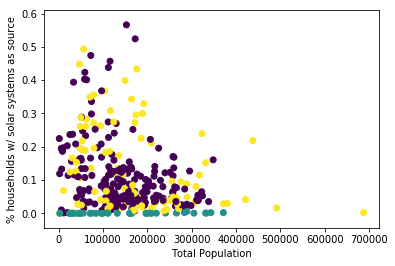

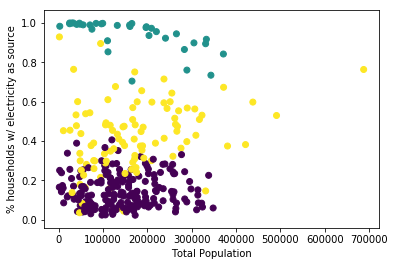

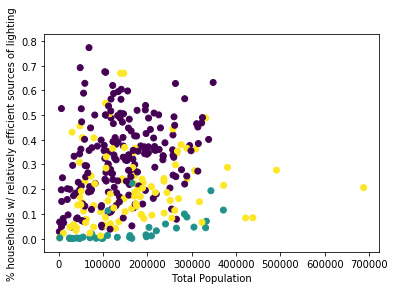

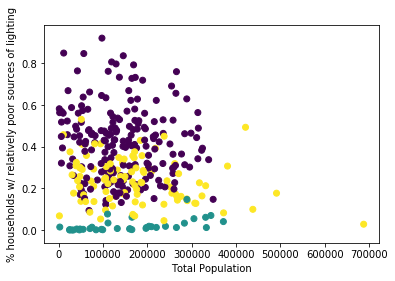

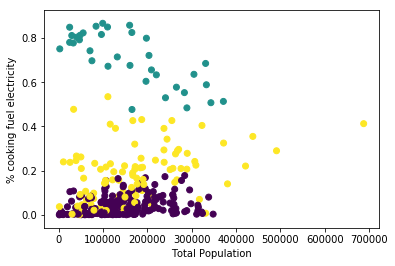

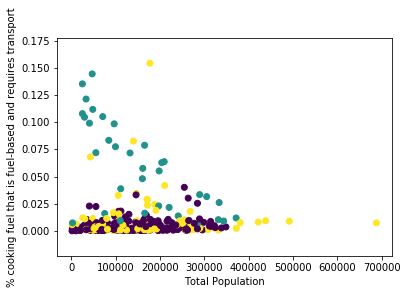

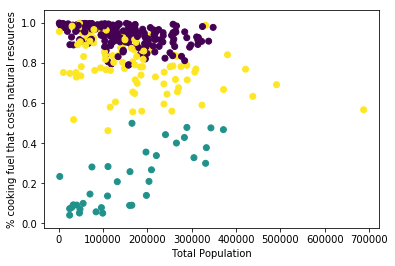

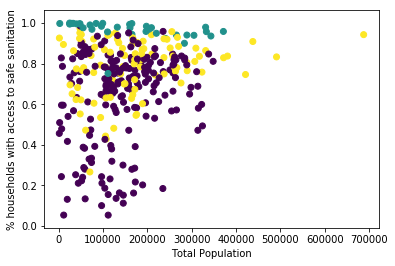

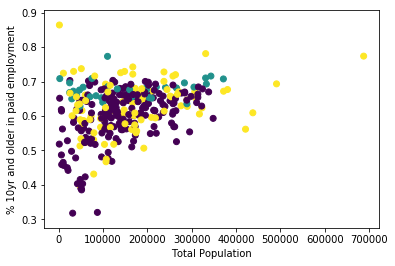

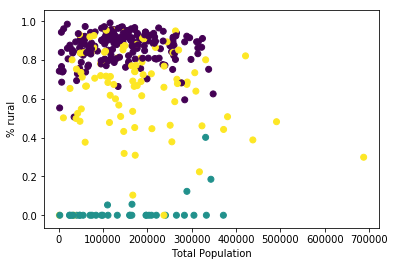

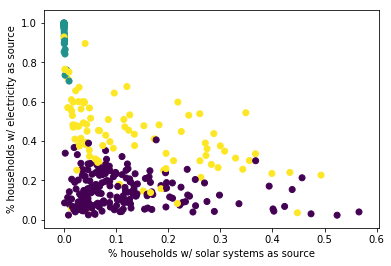

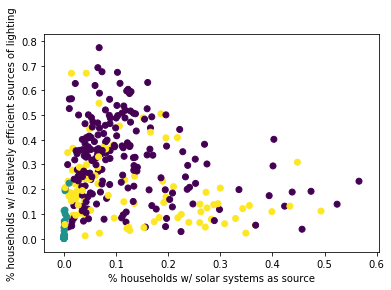

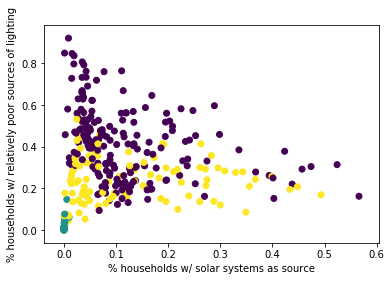

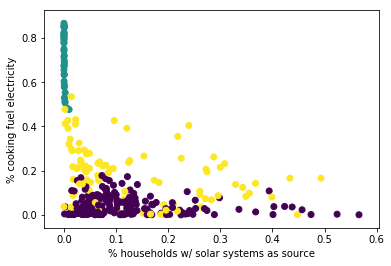

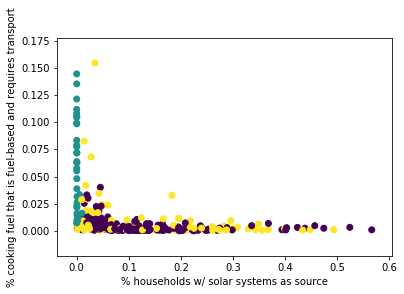

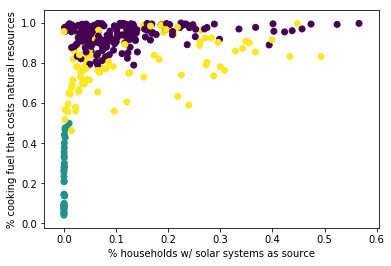

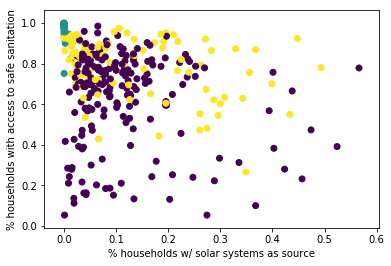

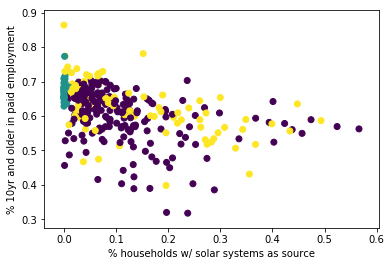

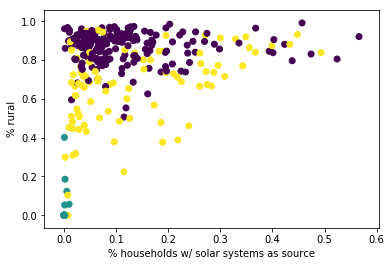

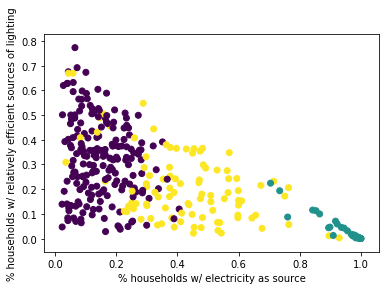

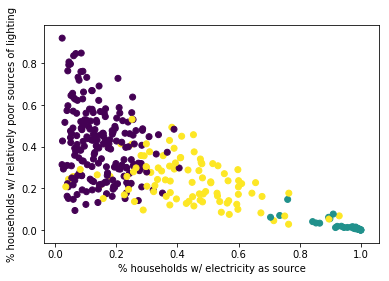

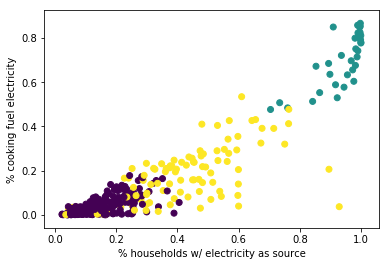

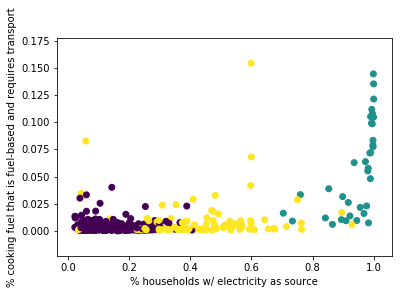

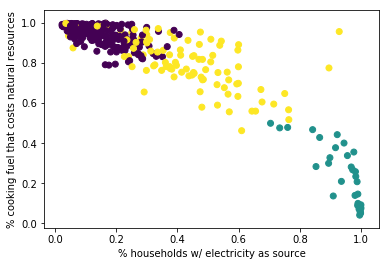

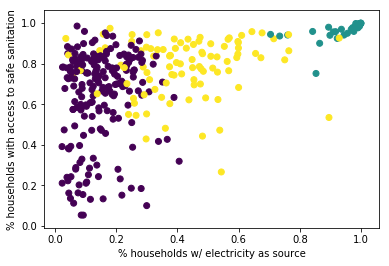

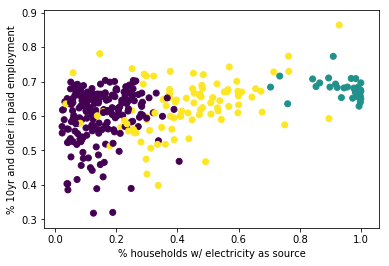

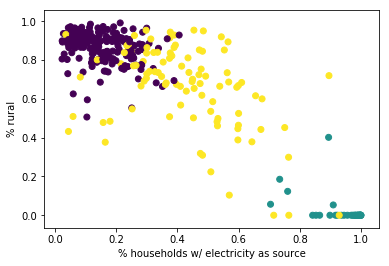

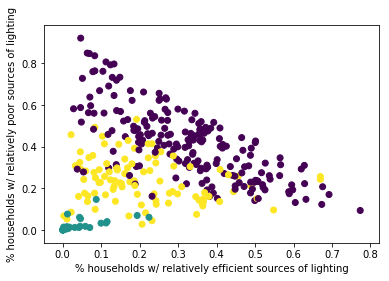

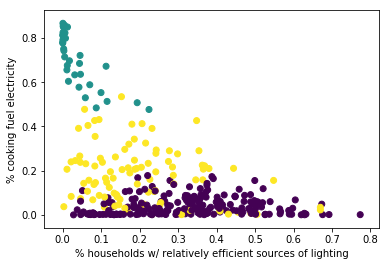

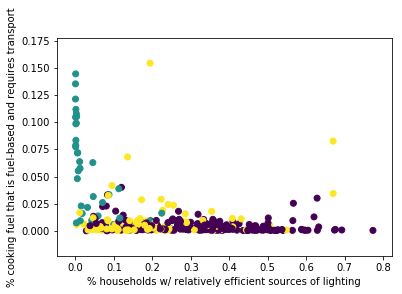

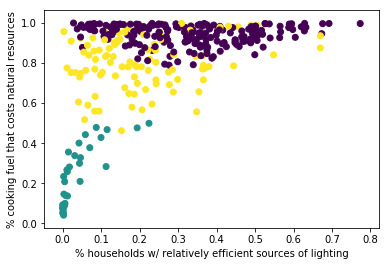

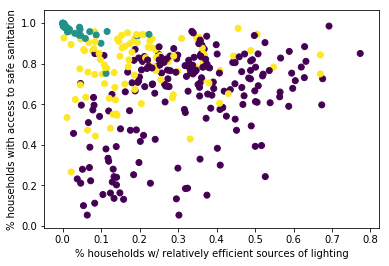

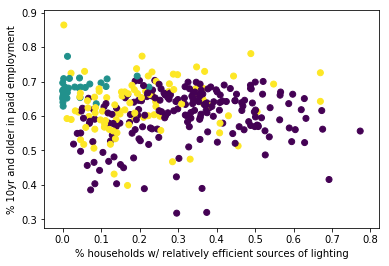

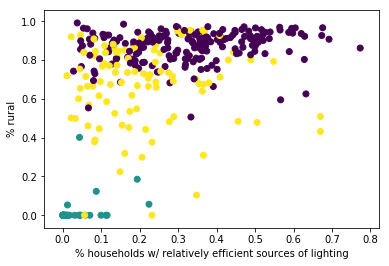

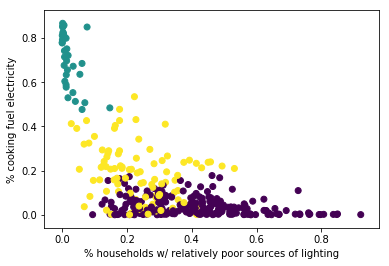

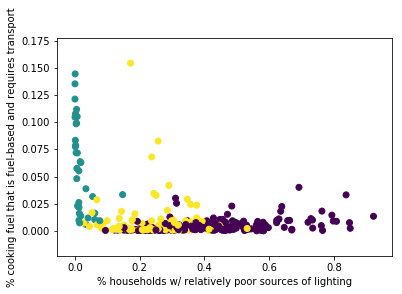

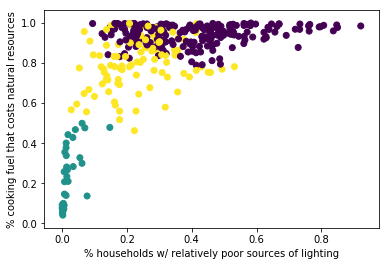

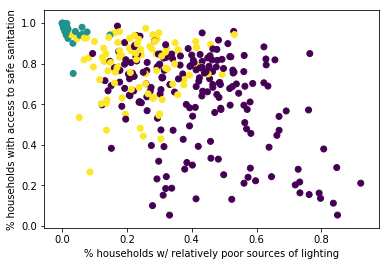

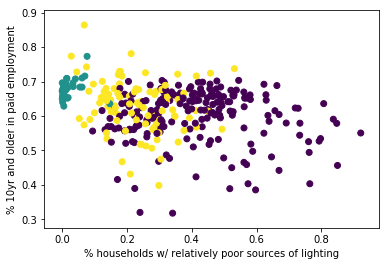

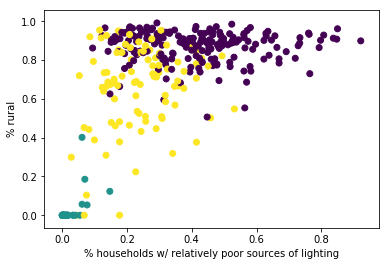

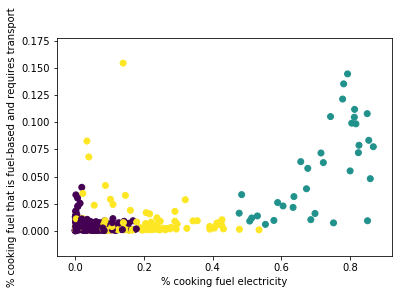

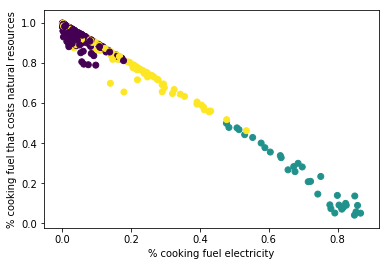

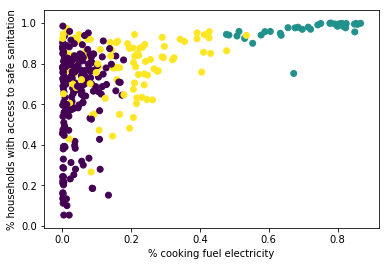

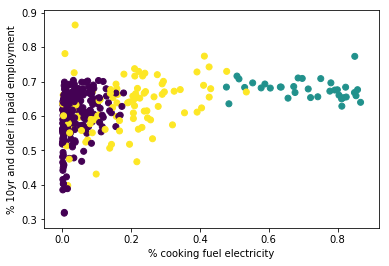

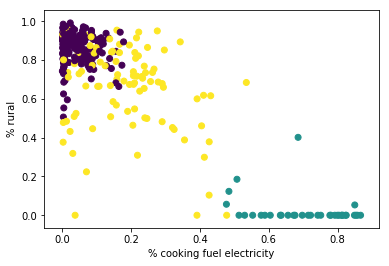

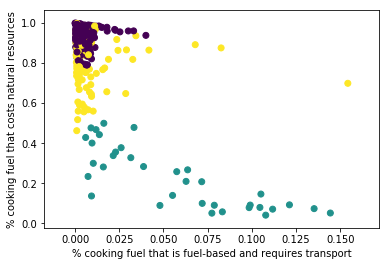

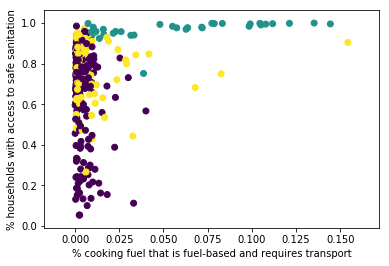

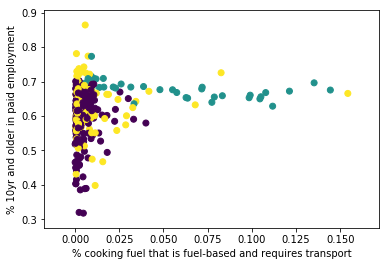

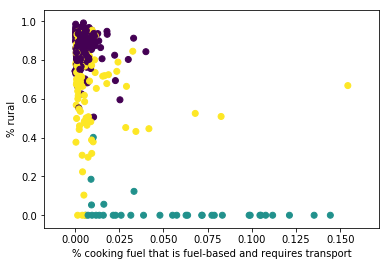

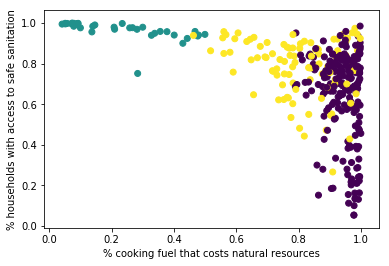

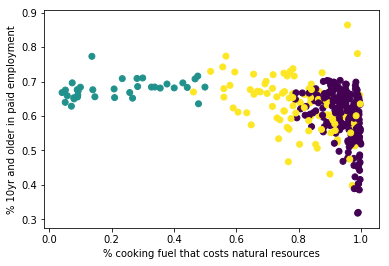

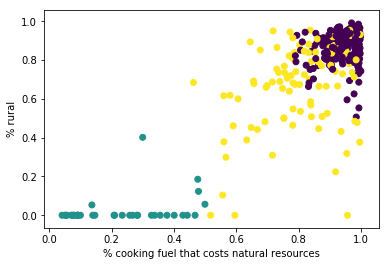

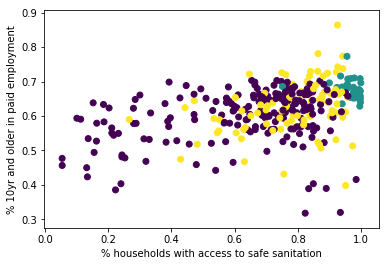

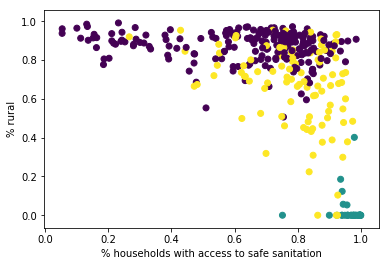

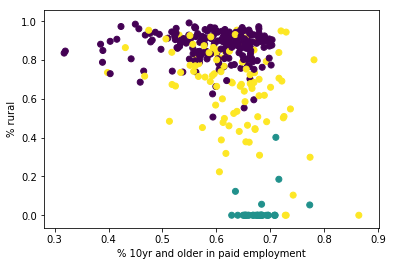

In [13]:
for x in range(len(pairwise_features)):
    for y in range(x + 1, len(pairwise_features)):
        x_label = pairwise_features[x]
        y_label = pairwise_features[y]
        plt.figure()
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.legend()
        plt.scatter(data_frame[x_label], data_frame[y_label], c=data_frame['cluster'])
        plt.show()

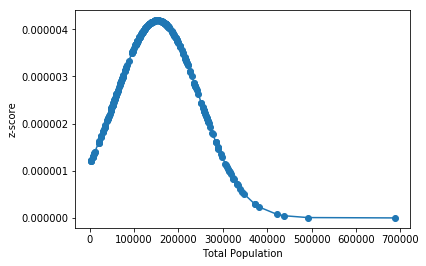

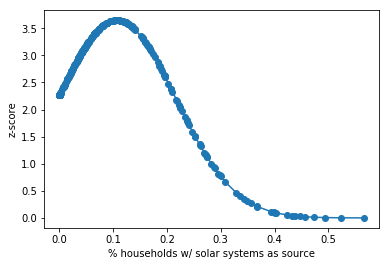

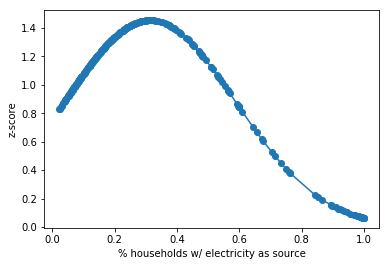

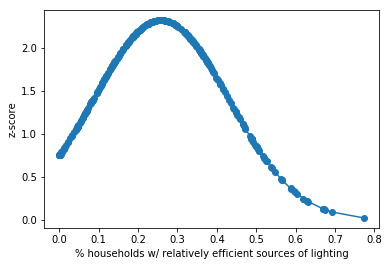

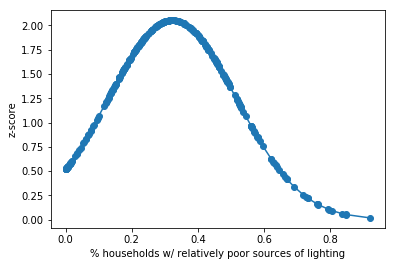

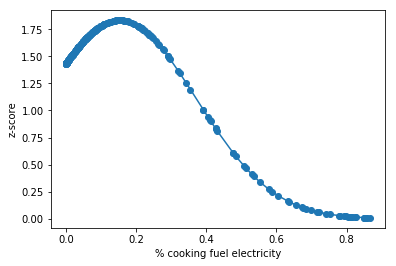

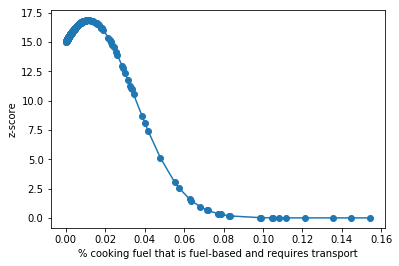

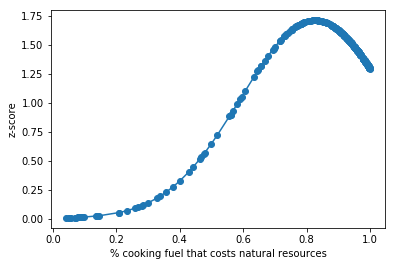

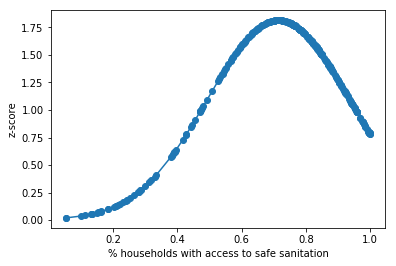

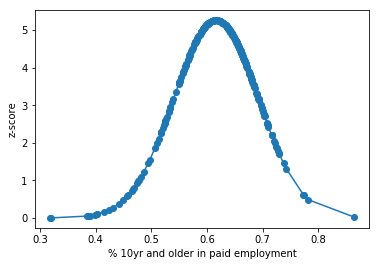

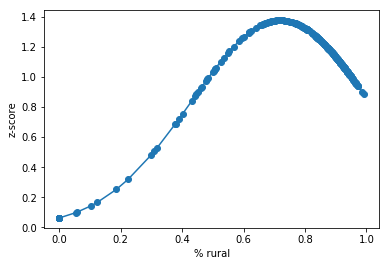

In [14]:
for f in pairwise_features:
    plt.figure()
    vals = sorted(data_frame[f])
    mean = np.mean(data_frame[f])
    std = np.std(data_frame[f])
    pdf = stats.norm.pdf(vals, mean, std)
    plt.xlabel(f)
    plt.ylabel('z-score')
    plt.plot(vals, pdf, '-o')

In [15]:
for f in pairwise_features:
    print(data_frame.groupby('cluster')[f].mean())

cluster
0    142741
1    158198
2    169897
Name: Total Population, dtype: int64
cluster
0    0.114310
1    0.000835
2    0.129397
Name: % households w/ solar systems as source, dtype: float64
cluster
0    0.148434
1    0.940562
2    0.422852
Name: % households w/ electricity as source, dtype: float64
cluster
0    0.321064
1    0.036415
2    0.208527
Name: % households w/ relatively efficient sources of lighting, dtype: float64
cluster
0    0.416192
1    0.022188
2    0.239223
Name: % households w/ relatively poor sources of lighting, dtype: float64
cluster
0    0.041419
1    0.707034
2    0.182136
Name: % cooking fuel electricity, dtype: float64
cluster
0    0.004489
1    0.056607
2    0.009265
Name: % cooking fuel that is fuel-based and requires transport, dtype: float64
cluster
0    0.941417
1    0.229337
2    0.802777
Name: % cooking fuel that costs natural resources, dtype: float64
cluster
0    0.634281
1    0.965798
2    0.786419
Name: % households with access to safe sanitation,

In [16]:
data_frame[data_frame.cluster == 1].mean()

Total Population                                            158198.600000
% rural                                                          0.023432
% 0-14                                                           0.191985
% currently attending school/college                             0.134865
% 10yr and older in paid employment                              0.677942
% in institutions                                                0.101835
percentile mean household                                        0.667209
% HQ housing                                                     0.621329
% LQ housing                                                     0.378671
% households with access to safe sanitation                      0.965798
% households w/ electricity as source                            0.940562
% households w/ solar systems as source                          0.000835
% households w/ relatively efficient sources of lighting         0.036415
% households w/ relatively poor source

In [17]:
data_frame[data_frame.cluster == 1].median()

Total Population                                            160307.000000
% rural                                                          0.000000
% 0-14                                                           0.192193
% currently attending school/college                             0.139586
% 10yr and older in paid employment                              0.678368
% in institutions                                                0.081818
percentile mean household                                        0.664386
% HQ housing                                                     0.589971
% LQ housing                                                     0.410029
% households with access to safe sanitation                      0.976893
% households w/ electricity as source                            0.980416
% households w/ solar systems as source                          0.000210
% households w/ relatively efficient sources of lighting         0.010826
% households w/ relatively poor source

In [18]:
data_frame[data_frame.cluster == 2].mean()

Total Population                                            169897.515464
% rural                                                          0.662961
% 0-14                                                           0.292541
% currently attending school/college                             0.161280
% 10yr and older in paid employment                              0.628616
% in institutions                                                0.073569
percentile mean household                                        0.694172
% HQ housing                                                     0.242386
% LQ housing                                                     0.757614
% households with access to safe sanitation                      0.786419
% households w/ electricity as source                            0.422852
% households w/ solar systems as source                          0.129397
% households w/ relatively efficient sources of lighting         0.208527
% households w/ relatively poor source

In [19]:
data_frame[data_frame.cluster == 2].median()

Total Population                                            149842.000000
% rural                                                          0.706506
% 0-14                                                           0.291561
% currently attending school/college                             0.161061
% 10yr and older in paid employment                              0.632144
% in institutions                                                0.054761
percentile mean household                                        0.656540
% HQ housing                                                     0.215360
% LQ housing                                                     0.784640
% households with access to safe sanitation                      0.828835
% households w/ electricity as source                            0.413677
% households w/ solar systems as source                          0.074451
% households w/ relatively efficient sources of lighting         0.179896
% households w/ relatively poor source

In [20]:
data_frame[data_frame.cluster == 0].mean()

Total Population                                            142741.868687
% rural                                                          0.869486
% 0-14                                                           0.311883
% currently attending school/college                             0.177554
% 10yr and older in paid employment                              0.598572
% in institutions                                                0.032517
percentile mean household                                        0.696600
% HQ housing                                                     0.091322
% LQ housing                                                     0.908678
% households with access to safe sanitation                      0.634281
% households w/ electricity as source                            0.148434
% households w/ solar systems as source                          0.114310
% households w/ relatively efficient sources of lighting         0.321064
% households w/ relatively poor source

In [21]:
data_frame[data_frame.cluster == 0].median()

Total Population                                            133389.500000
% rural                                                          0.892170
% 0-14                                                           0.306899
% currently attending school/college                             0.178642
% 10yr and older in paid employment                              0.615341
% in institutions                                                0.023275
percentile mean household                                        0.658490
% HQ housing                                                     0.077032
% LQ housing                                                     0.922968
% households with access to safe sanitation                      0.701475
% households w/ electricity as source                            0.134558
% households w/ solar systems as source                          0.081577
% households w/ relatively efficient sources of lighting         0.328326
% households w/ relatively poor source

In [24]:
len(data_frame[data_frame['cluster'] == 0])

198

In [25]:
len(data_frame[data_frame['cluster'] == 1])

35

In [26]:
len(data_frame[data_frame['cluster'] == 2])

97